In [1]:
import numpy as np
import random
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from utils import create_window_on_multiple_samples, split_train_test, draw_strokes

In [2]:
cloud = np.load("cloud.npz", allow_pickle=True, encoding="latin1")

In [3]:
train = cloud["train"]
test = cloud["test"]

In [4]:
windows = create_window_on_multiple_samples(train, 21)

Done processing 69999 samples, total of 2762224 windows and 58006704 datapoints


In [5]:
windows.shape

(2762224, 21, 3)

In [6]:
X, y = split_train_test(windows)

In [7]:
def add_features(window):
    originaldimensioncount = len(window.shape)
    if originaldimensioncount == 2:
        # add an extra dimension for 2 dimensional input
        window = window.reshape(1, *window.shape)
        
    Xsquared = (window[:,:,0] ** 2)
    Ysquared = (window[:,:,1] ** 2)
    XY = (window[:,:,1] * window[:,:,0])
    
    window = np.round(np.dstack((window, Xsquared, Ysquared, XY)))
    
    if originaldimensioncount == 2:
        # remove extra dimension
        window = window.reshape((*window.shape[1:]))
    return window

In [8]:
X = add_features(X)

In [9]:
X.shape

(2762224, 20, 6)

In [10]:
Xreshaped = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))

In [11]:
model = LinearRegression()
model.fit(Xreshaped, y)

LinearRegression()

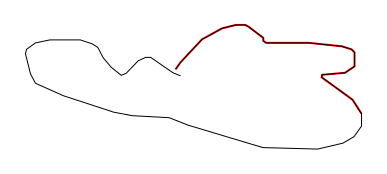

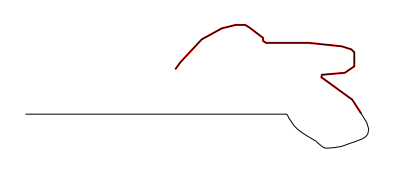

In [15]:
Xcopy = add_features(np.copy(random.choice(test)))
Xcopycopy = Xcopy[:20]

for i in range(300):
    yhat = np.round(model.predict(Xcopycopy[-20:].reshape(1,-1)))
    
    yhat = add_features(yhat)    
    Xcopycopy = np.vstack((Xcopycopy, yhat))

draw_strokes(Xcopy)
draw_strokes(Xcopycopy)